# CNN :

In [ ]:
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import np_utils as utils
from keras.layers import Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Load Cifar01 data:

In [ ]:
(X, y), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

# Normalize the data:

In [ ]:
X, X_test = X.astype('float32')/255.0, X_test.astype('float32')/255.0

# Convert to categorical

In [ ]:
y, y_test = utils.to_categorical(y, 10), utils.to_categorical(y_test, 10)

# Initialize the model:

In [ ]:
model = Sequential()

# Add Convolutional Layer

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Add the dropout rate

In [ ]:
model.add(Dropout(0.2))

# Add another CNN layer with padding = valid.

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))

# Add a Max Pooling layer.

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data

In [ ]:
model.add(Flatten())

# Add dense layer

In [ ]:
model.add(Dense(512, activation='relu'))

# Add dropout

In [ ]:
model.add(Dropout(0.3))

# Add the output dense layer:

In [ ]:
model.add(Dense(10, activation='softmax'))

# Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.5, decay=0.0004), metrics=['accuracy'])

# Fit the algorithm with 25 epochs

In [ ]:
model.fit(X, y, validation_data=(X_test, y_test), epochs=1, batch_size=512)

98/98 [==============================] - 154s 2s/step - loss: 2.2767 - accuracy: 0.1392 - val_loss: 2.1124 - val_accuracy: 0.2623


# Check accuracy

In [ ]:
print((model.evaluate(X_test, y_test)[1]*100))

313/313 [==============================] - 9s 28ms/step - loss: 2.1124 - accuracy: 0.2623
26.23000144958496


# Tensorflow CNN:

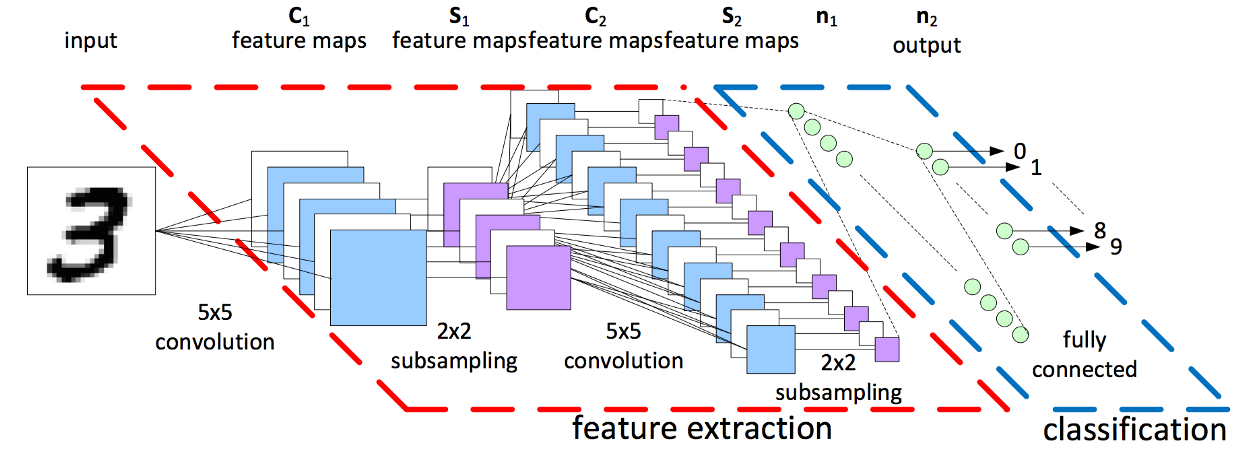

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [ ]:
!pip tensorflow
#from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

ERROR: unknown command "tensorflow"


NameError: ignored

In [ ]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:


NameError: ignored

# Placeholder variables

In [ ]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# Function for creating a new Convolution Layer

In [ ]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
        layer += biases
        
        return layer, weights


# Function for creating a new Pooling Layer

In [ ]:
def new_pool_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        return layer

# Function for creating a new ReLU Layer

In [ ]:
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        
        return layer

# Function for creating a new Fully connected Layer

In [ ]:
def new_fc_layer(input, num_inputs, num_outputs, name):
    
    with tf.variable_scope(name) as scope:

        # Create new weights and biases.
        weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
        biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases
        
        return layer

# Create Convolutional Neural Network

In [ ]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=6, name ="conv1")

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1, name="pool1")

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1, name="relu1")

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=6, filter_size=5, num_filters=16, name= "conv2")

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1, name="relu3")

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=10, name="fc2")

In [ ]:
# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, dimension=1)


# Cost Function

In [ ]:

# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)

# Optimizer

In [ ]:
# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

# Accuracy

In [ ]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Initialize the FileWriter
writer = tf.summary.FileWriter("Training_FileWriter/")
writer1 = tf.summary.FileWriter("Validation_FileWriter/")

In [ ]:
# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

In [ ]:
num_epochs = 100
batch_size = 100

# TensorFlow Session

In [ ]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        for batch in range(0, int(len(data.train.labels)/batch_size)):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            # Generate summary with the current batch of data and write to file
            summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            writer.add_summary(summ, epoch*int(len(data.train.labels)/batch_size) + batch)
        
          
        train_accuracy /= int(len(data.train.labels)/batch_size)
        
        # Generate summary and validate the model on the entire validation set
        summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:data.validation.images, y_true:data.validation.labels})
        writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))